## NOS3 location: chr7:150688144-150711687 
## STR: ~ 150699468
## EXON: 14

In literature: *"Novel functional role of CA repeats and hnRNP L in RNA stability." HUI et al.*

In [65]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt
%matplotlib inline

### File locations: 

In [66]:
FILE_ROOT = '/storage/dana/spliceSTR/expression/'

---
# Percent Spliced In (PSI) calculations
---

## Data necessary for PSI: exon reads and junction reads

![title](https://github.com/mgymrek/mgymrek.github.io/blob/master/images/sqtl_psi.png?raw=true)

### Exon reads: (A)

In [67]:
exon_df = pd.read_table(FILE_ROOT + 'GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_exon_reads.lung.txt',index_col=0)

In [68]:
exon_df

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0626-SM-5N9CS,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
Id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10_0,1106.46,156.21,1344.38,311.13,714.91,615.25,447.13,572.84,685.09,416.03,...,334.25,545.45,546.72,1526.91,376.76,1320.45,545.68,1341.22,1290.25,714.58
ENSG00000000003.10_1,163.18,26.85,181.70,51.46,99.61,82.91,66.91,71.76,89.20,65.61,...,59.63,65.83,88.91,207.00,71.99,171.38,82.34,157.10,213.82,91.29
ENSG00000000003.10_2,97.53,18.54,123.89,31.09,66.18,57.99,33.60,56.68,82.93,29.96,...,32.20,49.58,47.65,155.18,34.62,118.91,56.85,93.80,128.38,65.42
ENSG00000000003.10_3,167.22,35.20,228.74,52.74,101.53,114.87,81.32,92.80,118.80,59.82,...,36.87,100.39,107.04,198.51,49.99,177.15,70.01,162.97,239.04,100.30
ENSG00000000003.10_4,121.17,22.08,162.87,37.30,89.53,82.84,56.10,55.20,88.93,44.68,...,33.87,71.11,66.92,139.74,41.53,119.59,67.30,119.42,156.12,86.70
ENSG00000000003.10_5,100.76,21.46,112.96,35.37,59.58,52.51,46.30,41.49,66.59,39.10,...,26.46,42.95,45.35,92.67,29.99,94.55,51.08,82.61,109.64,53.10
ENSG00000000003.10_6,176.34,33.41,230.78,45.67,120.24,93.99,85.12,92.11,85.01,59.80,...,47.43,82.95,86.24,138.91,54.35,163.04,85.29,128.90,214.40,112.92
ENSG00000000003.10_7,206.33,44.25,220.68,49.24,154.43,100.64,63.51,90.12,83.43,51.00,...,32.29,128.75,118.17,147.79,63.78,185.62,72.43,178.97,148.35,115.68
ENSG00000000003.10_8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [69]:
enos_exon_df = exon_df.loc[exon_df.index.str.startswith('ENSG00000164867.6')]
enos_exon_df

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0626-SM-5N9CS,GTEX-14DAR-0226-SM-5S2PR,GTEX-139T6-0426-SM-5IJEM,GTEX-111CU-0326-SM-5GZXO,GTEX-YFC4-1126-SM-5RQJN,GTEX-TML8-0326-SM-4GICN,GTEX-111FC-1126-SM-5GZWU,GTEX-14E7W-1326-SM-5RQIV,...,GTEX-T5JC-0826-SM-32PMC,GTEX-YEC3-0226-SM-5IFJO,GTEX-1399S-1726-SM-5L3DI,GTEX-YEC4-0526-SM-4W21U,GTEX-T6MN-0826-SM-32PM4,GTEX-1399U-0826-SM-5KM1P,GTEX-T6MO-0426-SM-32QOI,GTEX-YECK-0926-SM-4W214,GTEX-T8EM-0326-SM-3DB7F,GTEX-YF7O-0626-SM-4W21R
Id,,,,,,,,,,,,,,,,,,,,,
ENSG00000164867.6_0,0.00,0.00,0.00,1.74,2.00,1.42,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.32,0.00,0.00,0.00,0.00
ENSG00000164867.6_1,30.70,3.83,62.09,15.32,36.82,73.14,38.24,35.54,11.45,94.61,...,58.62,48.51,9.70,3.24,13.46,31.30,19.72,21.38,44.45,10.40
ENSG00000164867.6_10,35.72,9.75,122.88,26.88,64.34,182.30,69.53,122.86,51.20,165.04,...,298.92,102.12,36.40,12.53,38.30,62.26,57.50,56.87,133.50,28.74
ENSG00000164867.6_11,15.53,5.67,47.29,12.57,29.87,95.57,23.41,53.84,21.57,79.76,...,131.16,46.12,9.51,6.29,19.91,15.87,15.68,22.88,67.67,16.21
ENSG00000164867.6_12,26.47,10.92,110.67,29.45,70.41,218.97,46.75,97.38,40.05,166.25,...,238.49,86.04,21.10,19.92,45.63,44.26,52.54,47.20,114.53,41.13
ENSG00000164867.6_13,13.78,10.72,93.82,18.38,58.03,155.12,31.10,62.97,31.29,109.51,...,186.46,79.66,21.25,15.66,42.08,36.05,48.12,26.78,84.18,34.76
ENSG00000164867.6_14,2.00,1.01,4.00,2.00,3.00,2.00,18.00,2.00,3.00,10.00,...,1.01,2.00,0.00,2.00,1.00,3.00,0.00,2.00,14.00,1.00
ENSG00000164867.6_15,33.00,8.03,61.00,15.00,63.03,111.03,178.05,50.00,20.04,221.08,...,174.00,68.03,10.00,24.21,49.00,46.00,22.00,96.00,155.57,58.00
ENSG00000164867.6_16,10.26,4.61,49.96,9.09,42.29,83.26,18.82,40.25,23.59,42.40,...,116.84,44.49,12.84,7.76,16.22,24.91,55.05,17.20,48.68,16.09


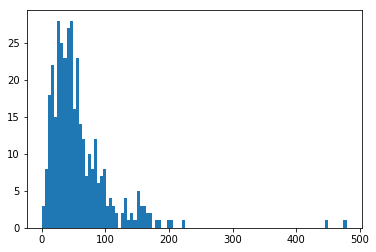

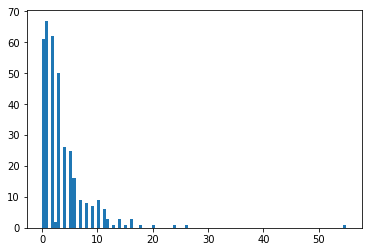

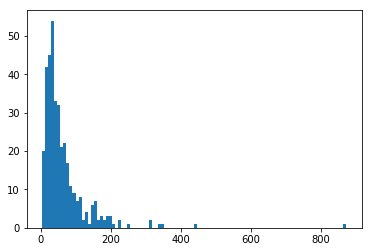

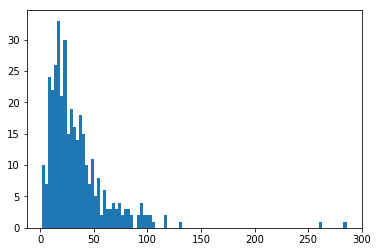

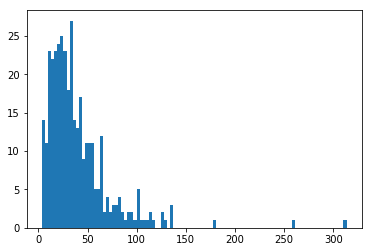

In [7]:
plt.hist(enos_exon_df.loc['ENSG00000164867.6_13'],bins=100)
plt.show()
plt.hist(enos_exon_df.loc['ENSG00000164867.6_14'],bins=100)
plt.show()
plt.hist(enos_exon_df.loc['ENSG00000164867.6_15'],bins=100)
plt.show()
plt.hist(enos_exon_df.loc['ENSG00000164867.6_16'],bins=100)
plt.show()
plt.hist(enos_exon_df.loc['ENSG00000164867.6_17'],bins=100)
plt.show()

## Removing samples with low total number of reads in the gene

In [70]:
enos_exon_sum = enos_exon_df.sum()
enos_exon_sum

GTEX-1117F-0226-SM-5GZZ7     519.00
GTEX-1117F-0426-SM-5EGHI     185.99
GTEX-1117F-0626-SM-5N9CS    2193.01
GTEX-14DAR-0226-SM-5S2PR     509.00
GTEX-139T6-0426-SM-5IJEM    1166.01
GTEX-111CU-0326-SM-5GZXO    3350.00
GTEX-YFC4-1126-SM-5RQJN     1119.99
GTEX-TML8-0326-SM-4GICN     1728.00
GTEX-111FC-1126-SM-5GZWU     805.02
GTEX-14E7W-1326-SM-5RQIV    2758.01
GTEX-YFCO-0426-SM-4W1Z7      840.99
GTEX-111VG-0726-SM-5GIDC    4854.73
GTEX-TMMY-0926-SM-33HBG      870.99
GTEX-TMMY-0926-SM-4TT1Z     1448.00
GTEX-TMMY-0926-SM-4VBQZ      615.01
GTEX-TMMY-0926-SM-4WKH4      572.01
GTEX-111YS-0626-SM-5GZXV    3032.99
GTEX-139TT-0726-SM-5K7XW    2455.99
GTEX-N7MS-0926-SM-2HMIZ     1099.96
GTEX-1122O-0126-SM-5GICA    1029.00
GTEX-YJ8O-1826-SM-5HL82      567.00
GTEX-TSE9-0726-SM-3DB8C      131.02
GTEX-N7MT-0126-SM-2D7VT      417.83
GTEX-139UW-0226-SM-5K7WU    1539.80
GTEX-1128S-0726-SM-5N9D6    1174.97
GTEX-139YR-0926-SM-5LZYB    1513.98
GTEX-U3ZH-0526-SM-3DB75     1160.03
GTEX-NFK9-1026-SM-2HMK1     

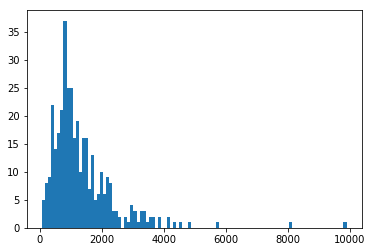

In [9]:
plt.hist(enos_exon_sum,bins=100)
plt.show()

### Removing the lowest 15th quantile : THIS MIGHT BE OVERKILL

In [10]:
enos_exon_trimmed = enos_exon_sum[enos_exon_sum > enos_exon_sum.quantile(q=0.15)]

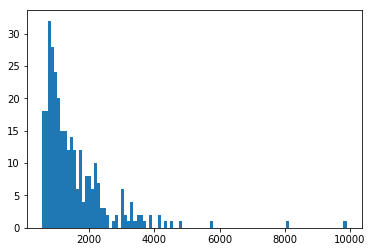

In [11]:
plt.hist(enos_exon_trimmed,bins=100)
plt.show()

In [12]:
len(enos_exon_trimmed)

309

In [13]:
enos_exon_trimmed_samples = enos_exon_trimmed.index

In [14]:
enos_exon_trimmed

GTEX-1117F-0626-SM-5N9CS    2193.01
GTEX-139T6-0426-SM-5IJEM    1166.01
GTEX-111CU-0326-SM-5GZXO    3350.00
GTEX-YFC4-1126-SM-5RQJN     1119.99
GTEX-TML8-0326-SM-4GICN     1728.00
GTEX-111FC-1126-SM-5GZWU     805.02
GTEX-14E7W-1326-SM-5RQIV    2758.01
GTEX-YFCO-0426-SM-4W1Z7      840.99
GTEX-111VG-0726-SM-5GIDC    4854.73
GTEX-TMMY-0926-SM-33HBG      870.99
GTEX-TMMY-0926-SM-4TT1Z     1448.00
GTEX-TMMY-0926-SM-4VBQZ      615.01
GTEX-TMMY-0926-SM-4WKH4      572.01
GTEX-111YS-0626-SM-5GZXV    3032.99
GTEX-139TT-0726-SM-5K7XW    2455.99
GTEX-N7MS-0926-SM-2HMIZ     1099.96
GTEX-1122O-0126-SM-5GICA    1029.00
GTEX-YJ8O-1826-SM-5HL82      567.00
GTEX-139UW-0226-SM-5K7WU    1539.80
GTEX-1128S-0726-SM-5N9D6    1174.97
GTEX-139YR-0926-SM-5LZYB    1513.98
GTEX-U3ZH-0526-SM-3DB75     1160.03
GTEX-NL3G-0526-SM-4RTWW     3624.98
GTEX-U3ZM-0426-SM-3DB73     1343.00
GTEX-U3ZM-0426-SM-57WG1      816.03
GTEX-U3ZM-0426-SM-59HKR      732.99
GTEX-ZA64-0326-SM-5HL8T      629.98
GTEX-13CF3-0426-SM-5IJEU    

### Junction reads: (B and C)

In [17]:
junction_df = pd.read_table(FILE_ROOT + 'GTEx_Data_20150112_RNAseq_Flux1.6_junction_reads.lung.txt',
                              index_col=0,
                              sep='\t',
                              skipinitialspace=True)

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
#junction_df = junction_df[enos_exon_trimmed_samples]
junction_df[junction_df['Gene_Symbol'] == 'ENSG00000164867.6']

,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,...,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYWO-0826-SM-5E45W,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
TargetID,,,,,,,,,,,,,,,,,,,,,
7_150688388_150690841,ENSG00000164867.6,7,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
7_150688388_150692291,ENSG00000164867.6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7_150691049_150692291,ENSG00000164867.6,7,11.0,44.0,7.0,45.0,60.0,10.0,16.0,20.0,...,37.0,7.0,6.0,5.0,8.0,15.0,12.0,14.0,23.0,18.0
7_150692402_150693492,ENSG00000164867.6,7,7.0,41.0,11.0,70.0,37.0,10.0,18.0,17.0,...,64.0,5.0,8.0,7.0,8.0,13.0,17.0,22.0,28.0,17.0
7_150692402_150695445,ENSG00000164867.6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7_150693640_150693851,ENSG00000164867.6,7,8.0,50.0,20.0,86.0,40.0,7.0,12.0,17.0,...,42.0,6.0,6.0,6.0,13.0,13.0,19.0,18.0,28.0,11.0
7_150694013_150695445,ENSG00000164867.6,7,9.0,55.0,18.0,92.0,54.0,19.0,23.0,21.0,...,74.0,4.0,6.0,17.0,11.0,16.0,28.0,29.0,40.0,21.0
7_150695536_150695627,ENSG00000164867.6,7,13.0,72.0,16.0,87.0,73.0,21.0,27.0,34.0,...,85.0,10.0,9.0,15.0,12.0,20.0,27.0,28.0,48.0,29.0
7_150695768_150696034,ENSG00000164867.6,7,13.0,76.0,15.0,98.0,79.0,25.0,26.0,28.0,...,93.0,10.0,11.0,17.0,9.0,23.0,30.0,32.0,56.0,27.0


In [82]:
chrom7 = junction_df.loc[junction_df.index.str.startswith('7')]
chrom7 = chrom7[chrom7['Gene_Symbol'] == 'ENSG00000164867.6']
exon_start = 150699288
exon_end = 150699392
new_index = []
for interval in chrom7.index:
    chrom,start,stop = interval.split('_')
    # C
    if int(start) <= exon_start and int(stop) >= exon_end: # depending on strand id
        print('C')
        print(interval)
        new_index.append(interval)
    #B1
    if int(start) < exon_start and (int(stop) >= exon_start and int(stop) <= exon_end):
        print('B1')
        print(interval)
        new_index.append(interval)
    #B2
    if (int(start) > exon_start and int(start) <= exon_start) and int(stop) > exon_end:
        print('B2')
        print(interval)
        new_index.append(interval)
chrom7 = chrom7.loc[new_index]
chrom7      

B1
7_150699053_150699288


,Gene_Symbol,Chr,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,...,GTEX-ZXG5-0826-SM-5GID6,GTEX-ZY6K-0326-SM-5SIBB,GTEX-ZYFG-0226-SM-5GIDT,GTEX-ZYT6-0526-SM-5GIEA,GTEX-ZYVF-1726-SM-5E443,GTEX-ZYW4-1526-SM-5SIBA,GTEX-ZYWO-0826-SM-5E45W,GTEX-ZYY3-0926-SM-5E454,GTEX-ZZPT-1326-SM-5E43H,GTEX-ZZPU-0526-SM-5E44U
TargetID,,,,,,,,,,,,,,,,,,,,,
7_150699053_150699288,ENSG00000164867.6,7,11.0,92.0,33.0,106.0,101.0,32.0,38.0,32.0,...,131.0,14.0,12.0,26.0,19.0,25.0,45.0,36.0,66.0,33.0


In [87]:
annotations = pd.read_csv('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv',index_col=0)
annotations[annotations['gene.id'] == 'ENSG00000164867.6'].sort_values(by='probe.start')

,gene.chr,gene.start,gene.stop,gene.id,gene.strand,probe.chr,probe.start,probe.stop,probe.id,probe.strand
96667,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150688083,150688388,ENSG00000164867.6_0,+
96668,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150690841,150691049,ENSG00000164867.6_1,+
96669,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150692291,150692402,ENSG00000164867.6_2,+
96670,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150693492,150693640,ENSG00000164867.6_3,+
96671,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150693851,150694013,ENSG00000164867.6_4,+
96672,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150695445,150695536,ENSG00000164867.6_5,+
96673,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150695627,150695768,ENSG00000164867.6_6,+
96674,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150696034,150696173,ENSG00000164867.6_7,+
96675,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150696278,150696452,ENSG00000164867.6_8,+
96676,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150697586,150697687,ENSG00000164867.6_9,+


In [83]:
exon = annotations[annotations['probe.id'] == 'ENSG00000164867.6_13'].reindex()
exon

,gene.chr,gene.start,gene.stop,gene.id,gene.strand,probe.chr,probe.start,probe.stop,probe.id,probe.strand
96680,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150699288,150699392,ENSG00000164867.6_13,+


In [49]:
exon['gene.chr'].reset_index(drop=True)[0]

'chr8'

In [52]:
for sample in list(enos_exon_df.index):
    print(sample)
    exon = annotations[annotations['probe.id'] == sample].reset_index(drop=True)
    start = int(exon['probe.start'])
    stop = int(exon['probe.stop'])
    chrom = exon['gene.chr'][0].split('chr')[1]
    exon_len = math.fabs(start - stop)
    #for interval 
    print('Chrom: {}'.format(chrom))
    print('Start: {}'.format(start))
    print('Stop: {}'.format(stop))
    print('Exon length: {}'.format(exon_len))
    print()

ENSG00000168484.8_0
Chrom: 8
Start: 22016126
Stop: 22016594
Exon length: 468.0

ENSG00000168484.8_1
Chrom: 8
Start: 22016988
Stop: 22017368
Exon length: 380.0

ENSG00000168484.8_2
Chrom: 8
Start: 22019168
Stop: 22019383
Exon length: 215.0

ENSG00000168484.8_3
Chrom: 8
Start: 22020087
Stop: 22020245
Exon length: 158.0

ENSG00000168484.8_4
Chrom: 8
Start: 22020593
Stop: 22020748
Exon length: 155.0

ENSG00000168484.8_5
Chrom: 8
Start: 22020949
Stop: 22021992
Exon length: 1043.0



#### enos exon 14 id: 

In [20]:
enos_e14 = 'ENSG00000164867.6_15'

In [22]:
A_reads = exon_df.loc[enos_e14]
A_reads = A_reads[enos_exon_trimmed_samples]

#### enos exon 14 junctions: 

In [39]:
junction_ids = {'B_1':'7_150699392_150700399','C':'7_150699392_150703515'}
                #'B_2':'7_150699392_150700239',
                #'C':'7_150699392_150703515'}

In [40]:
B_reads = junction_df.loc[[junction_ids['B_1'],]]#junction_ids['B_2']]]
B_reads = B_reads.iloc[:,2:].sum()

In [41]:
C_reads = junction_df.loc[[junction_ids['C']]]
C_reads = C_reads.iloc[:,2:].sum()

### Calculation

In [42]:
A_B_reads = A_reads + B_reads

In [43]:
A_B_reads

GTEX-1117F-0226-SM-5GZZ7       NaN
GTEX-1117F-0626-SM-5N9CS       NaN
GTEX-111CU-0326-SM-5GZXO    112.03
GTEX-111FC-1126-SM-5GZWU     21.04
GTEX-111VG-0726-SM-5GIDC    441.00
GTEX-111YS-0626-SM-5GZXV     89.33
GTEX-1122O-0126-SM-5GICA     32.00
GTEX-1128S-0726-SM-5N9D6     52.00
GTEX-117YW-0526-SM-5H11C    202.00
GTEX-117YX-1326-SM-5H125       NaN
GTEX-11DXX-0626-SM-5Q5AG     24.00
GTEX-11DXZ-0726-SM-5N9C4     29.00
GTEX-11DZ1-0426-SM-5H11A     86.16
GTEX-11EI6-0826-SM-5985V    114.00
GTEX-11EMC-0126-SM-5EGKV    202.47
GTEX-11EQ9-0226-SM-5A5JX     26.00
GTEX-11GSP-0726-SM-5986L    147.00
GTEX-11I78-0126-SM-5HL6F       NaN
GTEX-11ILO-0726-SM-5HL5I     50.00
GTEX-11LCK-0426-SM-5A5M8     31.00
GTEX-11NSD-0326-SM-5A5LS     33.00
GTEX-11NUK-0826-SM-5HL4U     56.00
GTEX-11NV4-1126-SM-5HL6J    311.07
GTEX-11O72-1326-SM-5BC5A     33.00
GTEX-11OF3-1126-SM-5986C     72.67
GTEX-11P7K-0326-SM-59871     32.00
GTEX-11P81-0226-SM-5HL5M     35.42
GTEX-11PRG-0926-SM-5EGI8     52.05
GTEX-11TT1-1626-SM-5

In [44]:
mask = (A_B_reads == 0) & (C_reads == 0)
PSI = 100*((A_B_reads)/((A_B_reads + C_reads))) if (A_B_reads.sum() + C_reads.sum()) > 0.00 else 0
PSI = PSI.where(~mask,0)
 
#PSI = PSI.fillna(0) # Entries with 0 reads in A,B or C end up being NaN so marking them as 0 

In [45]:
PSI.dropna()

GTEX-111CU-0326-SM-5GZXO    55.452161
GTEX-111FC-1126-SM-5GZWU    58.379578
GTEX-111VG-0726-SM-5GIDC    82.429907
GTEX-111YS-0626-SM-5GZXV    45.968198
GTEX-1122O-0126-SM-5GICA    62.745098
GTEX-1128S-0726-SM-5N9D6    59.090909
GTEX-117YW-0526-SM-5H11C    89.777778
GTEX-11DXX-0626-SM-5Q5AG    43.636364
GTEX-11DXZ-0726-SM-5N9C4    56.862745
GTEX-11DZ1-0426-SM-5H11A    73.540457
GTEX-11EI6-0826-SM-5985V    90.476190
GTEX-11EMC-0126-SM-5EGKV    67.384431
GTEX-11EQ9-0226-SM-5A5JX    54.166667
GTEX-11GSP-0726-SM-5986L    69.668246
GTEX-11ILO-0726-SM-5HL5I    61.728395
GTEX-11LCK-0426-SM-5A5M8    62.000000
GTEX-11NSD-0326-SM-5A5LS    50.769231
GTEX-11NUK-0826-SM-5HL4U    73.684211
GTEX-11NV4-1126-SM-5HL6J    78.737945
GTEX-11O72-1326-SM-5BC5A    61.111111
GTEX-11OF3-1126-SM-5986C    67.493266
GTEX-11P7K-0326-SM-59871    50.793651
GTEX-11P81-0226-SM-5HL5M    65.086365
GTEX-11PRG-0926-SM-5EGI8    69.353764
GTEX-11TT1-1626-SM-5EQL7    58.490566
GTEX-11TUW-0526-SM-5LU9A    64.466056
GTEX-11UD2-0

In [30]:
PSI

GTEX-1117F-0226-SM-5GZZ7          NaN
GTEX-1117F-0626-SM-5N9CS          NaN
GTEX-111CU-0326-SM-5GZXO    55.230563
GTEX-111FC-1126-SM-5GZWU    57.191781
GTEX-111VG-0726-SM-5GIDC    82.429907
GTEX-111YS-0626-SM-5GZXV    45.688719
GTEX-1122O-0126-SM-5GICA    62.745098
GTEX-1128S-0726-SM-5N9D6    59.090909
GTEX-117YW-0526-SM-5H11C    89.777778
GTEX-117YX-1326-SM-5H125          NaN
GTEX-11DXX-0626-SM-5Q5AG    43.636364
GTEX-11DXZ-0726-SM-5N9C4    56.862745
GTEX-11DZ1-0426-SM-5H11A    73.312672
GTEX-11EI6-0826-SM-5985V    90.476190
GTEX-11EMC-0126-SM-5EGKV    67.384431
GTEX-11EQ9-0226-SM-5A5JX    54.166667
GTEX-11GSP-0726-SM-5986L    69.668246
GTEX-11I78-0126-SM-5HL6F          NaN
GTEX-11ILO-0726-SM-5HL5I    61.728395
GTEX-11LCK-0426-SM-5A5M8    62.000000
GTEX-11NSD-0326-SM-5A5LS    50.769231
GTEX-11NUK-0826-SM-5HL4U    73.684211
GTEX-11NV4-1126-SM-5HL6J    78.791628
GTEX-11O72-1326-SM-5BC5A    61.111111
GTEX-11OF3-1126-SM-5986C    67.493266
GTEX-11P7K-0326-SM-59871    50.793651
GTEX-11P81-0

### Normalizing for JUST exon length

In [31]:
exon_len = math.fabs(150700239-150701023 + 1)
exon_len

783.0

In [68]:
A_B_norm = (A_B_reads)/(exon_len-1)

In [69]:
C_norm = (C_reads)

In [70]:
PSI_norm = 100*((A_B_norm)/(A_B_norm + C_norm)) if (A_B_reads.sum() + C_reads.sum()) > 0.00 else 0
PSI_norm = PSI_norm.where(~mask,0)
PSI_norm

GTEX-1117F-0226-SM-5GZZ7         NaN
GTEX-1117F-0626-SM-5N9CS         NaN
GTEX-111CU-0326-SM-5GZXO    0.158926
GTEX-111FC-1126-SM-5GZWU    0.179048
GTEX-111VG-0726-SM-5GIDC    0.596357
GTEX-111YS-0626-SM-5GZXV    0.108675
GTEX-1122O-0126-SM-5GICA    0.214909
GTEX-1128S-0726-SM-5N9D6    0.184371
GTEX-117YW-0526-SM-5H11C    1.110622
GTEX-117YX-1326-SM-5H125         NaN
GTEX-11DXX-0626-SM-5Q5AG    0.098904
GTEX-11DXZ-0726-SM-5N9C4    0.168282
GTEX-11DZ1-0426-SM-5H11A    0.354157
GTEX-11EI6-0826-SM-5985V    1.200253
GTEX-11EMC-0126-SM-5EGKV    0.264799
GTEX-11EQ9-0226-SM-5A5JX    0.150900
GTEX-11GSP-0726-SM-5986L    0.292858
GTEX-11I78-0126-SM-5HL6F         NaN
GTEX-11ILO-0726-SM-5HL5I    0.205829
GTEX-11LCK-0426-SM-5A5M8    0.208207
GTEX-11NSD-0326-SM-5A5LS    0.131700
GTEX-11NUK-0826-SM-5HL4U    0.356779
GTEX-11NV4-1126-SM-5HL6J    0.472833
GTEX-11O72-1326-SM-5BC5A    0.200547
GTEX-11OF3-1126-SM-5986C    0.264807
GTEX-11P7K-0326-SM-59871    0.131828
GTEX-11P81-0226-SM-5HL5M    0.237823
G

In [71]:
PSI_norm['GTEX-ZC5H-0926-SM-5CVMZ']

0.04424561231011258

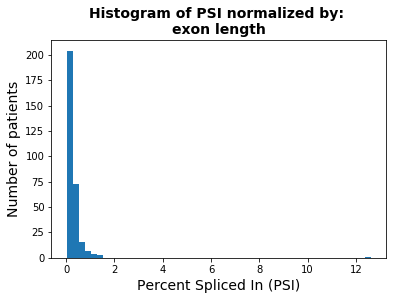

In [73]:
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.hist(PSI_norm.dropna(),bins=50)
plt.xlabel('Percent Spliced In (PSI)',fontsize=14)
plt.ylabel('Number of patients',fontsize=14)
plt.title('Histogram of PSI normalized by: \nexon length',fontsize=14,fontweight='bold')
plt.show()

### Normalizing for exon length and read length

In [46]:
exon_len = math.fabs(150700239-150701023 + 1)
exon_len

783.0

In [47]:
read_len = 75*2

In [48]:
A_B_norm = (A_B_reads)/(exon_len+read_len-1)

In [49]:
C_norm = (C_reads)/(read_len-1)

In [50]:
PSI_norm = 100*((A_B_norm)/(A_B_norm + C_norm)) if (A_B_reads.sum() + C_reads.sum()) > 0.00 else 0
PSI_norm = PSI_norm.where(~mask,0)

In [51]:
PSI_norm[(PSI_norm>0) & (PSI_norm<80)]

GTEX-111CU-0326-SM-5GZXO    16.597455
GTEX-111FC-1126-SM-5GZWU    18.317075
GTEX-111VG-0726-SM-5GIDC    42.858261
GTEX-111YS-0626-SM-5GZXV    11.972789
GTEX-1122O-0126-SM-5GICA    21.213739
GTEX-1128S-0726-SM-5N9D6    18.760291
GTEX-117YW-0526-SM-5H11C    58.404160
GTEX-11DXX-0626-SM-5Q5AG    11.013921
GTEX-11DXZ-0726-SM-5N9C4    17.405841
GTEX-11DZ1-0426-SM-5H11A    30.764173
GTEX-11EI6-0826-SM-5985V    60.298190
GTEX-11EMC-0126-SM-5EGKV    24.828831
GTEX-11EQ9-0226-SM-5A5JX    15.891377
GTEX-11GSP-0726-SM-5986L    26.858040
GTEX-11ILO-0726-SM-5HL5I    20.499697
GTEX-11LCK-0426-SM-5A5M8    20.687956
GTEX-11NSD-0326-SM-5A5LS    14.153306
GTEX-11NUK-0826-SM-5HL4U    30.922028
GTEX-11NV4-1126-SM-5HL6J    37.187408
GTEX-11O72-1326-SM-5BC5A    20.078403
GTEX-11OF3-1126-SM-5986C    24.921452
GTEX-11P7K-0326-SM-59871    14.165181
GTEX-11P81-0226-SM-5HL5M    22.960395
GTEX-11PRG-0926-SM-5EGI8    26.567539
GTEX-11TT1-1626-SM-5EQL7    18.385543
GTEX-11TUW-0526-SM-5LU9A    22.483029
GTEX-11UD2-0

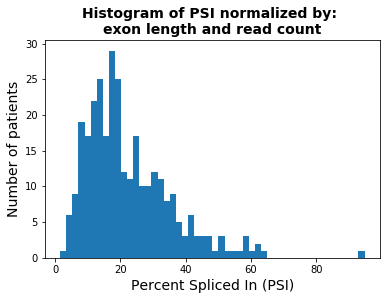

In [52]:
plt.figure(figsize=(6,4))
plt.hist(PSI_norm.dropna(),bins=50)
plt.xlabel('Percent Spliced In (PSI)',fontsize=14)
plt.ylabel('Number of patients',fontsize=14)
plt.title('Histogram of PSI normalized by: \nexon length and read count',fontsize=14,fontweight='bold')
plt.show()

In [87]:
PSI_norm_df = pd.DataFrame(PSI_norm, columns = ['ENSG00000164867.6_15'])
original_index = PSI_norm_df.index

In [64]:
PSI_norm.loc[PSI_norm.index.str.startswith('GTEX-111YS')]

GTEX-111YS-0626-SM-5GZXV    11.972789
dtype: float64

## These are duplicated samples, seeing quite different PSI values for these ones. It would be quite interesting to see how these samples differ and whether it may be possible that they have such different exon 10 epression.

In [89]:
abbr_index = ['-'.join(sample.split('-')[0:2]) for sample in list(original_index)]
PSI_norm_df.index = abbr_index
PSI_norm_df.loc[PSI_norm_df.index.duplicated()].dropna()

,ENSG00000164867.6_15
GTEX-O5YV,5.691191
GTEX-OHPL,14.297137
GTEX-OHPL,18.195695
GTEX-OXRO,64.589054
GTEX-PLZ6,27.729529
GTEX-POYW,11.392451
GTEX-POYW,11.731346
GTEX-PVOW,33.844407
GTEX-PVOW,14.136817
GTEX-Q2AG,46.788467


In [84]:
PSI_norm_df = PSI_norm_df[~PSI_norm_df.index.duplicated(keep='first')]
PSI_norm_df.dropna().to_csv('enos_PSI.csv')

In [44]:
ann_columns = 'gene.chr	gene.start	gene.stop	gene.id	gene.strand	probe.chr	probe.start	probe.stop	probe.id	probe.strand'

In [16]:
annotation_df = pd.read_table('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv',sep=',',index_col=0)
annotation_df[annotation_df['gene.id'] =='ENSG00000164867.6']

,gene.chr,gene.start,gene.stop,gene.id,gene.strand,probe.chr,probe.start,probe.stop,probe.id,probe.strand
96667,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150688083,150688388,ENSG00000164867.6_0,+
96668,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150690841,150691049,ENSG00000164867.6_1,+
96669,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150692291,150692402,ENSG00000164867.6_2,+
96670,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150693492,150693640,ENSG00000164867.6_3,+
96671,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150693851,150694013,ENSG00000164867.6_4,+
96672,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150695445,150695536,ENSG00000164867.6_5,+
96673,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150695627,150695768,ENSG00000164867.6_6,+
96674,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150696034,150696173,ENSG00000164867.6_7,+
96675,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150696278,150696452,ENSG00000164867.6_8,+
96676,chr7,150688083,150711676,ENSG00000164867.6,+,chr7,150697586,150697687,ENSG00000164867.6_9,+


In [ ]:
import pandas as pd

In [9]:
CHROM = 'chr7'
expr = pd.read_csv('/home/dana/workspace/gtex-estrs/spliceSTR/CFTR_PSI.csv')
if "Unnamed: 0" in expr.columns:            ##Often seen in csv created with Pandas
    expr.index = expr["Unnamed: 0"].values
    expr = expr.drop("Unnamed: 0", 1)

# Load expression annotation

expr_annot = pd.read_csv('/storage/dana/spliceSTR/expression/gencode.v19.annotations_exons.csv')
expr_annot.index = expr_annot["probe.id"].values
expr_annot = expr_annot.loc[[item for item in expr.columns if item in expr_annot.index],:]
expr_annot = expr_annot[expr_annot["gene.chr"] == CHROM]
# print('expression_is_this_big {}'.format(expr_annot.shape))

In [5]:
import statsmodels.api as sm

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


In [ ]:
1

,ENSG00000001626.10_13
GTEX-111CU,100.000000
GTEX-111FC,100.000000
GTEX-111VG,0.000000
GTEX-111YS,91.615428
GTEX-1122O,100.000000
GTEX-1128S,100.000000
GTEX-117YX,100.000000
GTEX-11DXX,100.000000
GTEX-11DXZ,100.000000
GTEX-11EMC,100.000000


In [18]:
df = pd.read_csv('CFTR_PSI.csv',sep=',',index_col = 0)
df.index.is_unique

True

In [ ]:
GTEX-YFC4-1126-SM-5RQJN

In [58]:
strgt = pd.read_csv('Allele_Gentype_enos.table', sep="\t", low_memory=False)
strgt

,chrom,start,GTEX-PLZ4,GTEX-NFK9,GTEX-OHPM,GTEX-X4EO,GTEX-UTHO,GTEX-TMZS,GTEX-WY7C,GTEX-P44H,...,GTEX-1212Z,GTEX-14C39,GTEX-131XF,GTEX-111YS,GTEX-ZXES,GTEX-11WQK,GTEX-ZVP2,GTEX-Y8E4,GTEX-1GN2E,GTEX-14PJM
0,chr7,150689085,"NA,NA","0,1","0,0","0,0","NA,NA","NA,NA","0,0","0,0",...,"0,0","NA,NA","0,0","0,0","0,0","0,0","0,0","0,0","NA,NA","0,1"
1,chr7,150689236,"NA,NA","NA,NA","0,1","0,1","0,1","0,1","0,1","0,1",...,"0,0","0,0","NA,NA","1,1","0,0","1,-1","NA,NA","0,1","0,1","NA,NA"
2,chr7,150690940,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
3,chr7,150697172,"0,0","0,0","0,0","0,0","0,0","0,0","NA,NA","0,0",...,"0,0","0,0","0,0","NA,NA","NA,NA","0,0","0,0","0,0","0,0","0,0"
4,chr7,150699472,"0,0","0,0","0,0","-10,2","-8,-6","-20,2","NA,NA","0,0",...,"-6,2","NA,NA","-4,2","-22,-12","NA,NA","-18,-8","-16,-6","NA,NA","-18,-6","-8,-4"
5,chr7,150699893,"0,-9","0,-9","0,-9","0,0","-9,-9","0,0","0,-9","0,-9",...,"0,-9","0,0","0,0","0,-9","0,0","-9,-9","-9,5","0,-9","0,-9","0,-9"
6,chr7,150701423,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
7,chr7,150701927,"0,-4","0,-12","0,-4","0,0","0,-4","0,0","0,-4","0,-4",...,"0,0","0,0","0,0","0,-4","0,0","-4,-4","-4,-4","0,-4","0,0","0,0"
8,chr7,150708700,"NA,NA","NA,NA","0,-1","NA,NA","-1,-1","NA,NA","NA,NA","NA,NA",...,"-4,-1","NA,NA","0,0","NA,NA","0,0","-1,-1","NA,NA","0,-1","-1,-1","NA,NA"
9,chr7,150709300,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"


In [57]:
list(strgt.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]